In [1]:
#Package Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Link to dataset

https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

In [2]:
#import survey dataset
mhtech = pd.read_csv('survey.csv')
#drop timestamp, comments, and state as we arent interested in these columns at this time
mhtech.drop(['Timestamp', 'comments', 'state'] , axis = 1, inplace = True)

In [3]:
#check for missing value and general info
mhtech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [9]:
#get a more detailed overview of our variables
mhtech.describe(include = 'all')

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.259000e+03,1259,1259,1241,1259,1259,995,1259,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,NaN,49,48,2,2,2,4,6,2,2,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,United States,No,No,Yes,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,615,751,1095,767,637,465,290,883,1031,...,819,563,490,925,774,516,1008,557,576,1075
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#I want a more detailed view of the values in our categorical columns
for col in mhtech:
    print(col, mhtech[col].unique())

Age [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning andr

In [ ]:
#Overall most categorical columns seem fine but there are a few that need cleaning:
#gender (narrow down value options)
#self_employed (deal with nan values)
#work_interfere (deal with nan values)

In [14]:
#gender seems to have alot of values, we can clean that up
#first to take a closer look
mhtech.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [15]:
#group gender into male, female, nonbinary or queer

#first capitalize all strings to reduce the number of unique values
mhtech.Gender = mhtech.Gender.str.capitalize()

#next replace female mispellings to be 'female'

mhtech.Gender.replace({'Cis female', 'F', 'Woman', 'Femake', 'Female ', 'Cis-female/femme', 'Female (cis)', 'Femail'}, 'Female', inplace = True)

#replace male mispellings to be 'male'

mhtech.Gender.replace({'M', 'Maile', 'Cis male', 'Mal', 'Male (cis)', 'Make', 'Male ', 'Man', 'Msle', 'Mail', 'Malr', 'Cis man'}, 'Male', inplace = True)

#replace queer identities with a single signifier
mhtech.Gender.replace({'Trans-female', 'Female (trans)', 'Trans woman', 'Male-ish', 'Something kinda male?', 'Queer/she/they', 'Non-binary', 'All', 'Enby', 'Fluid', 'Genderqueer', 'Androgyne', 'Agender', 'Guy (-ish) ^_^', 'Male leaning androgynous', 'Neuter', 'Queer', 'Ostensibly male, unsure what that really means', 'Nah'}, 'Trans/NB', inplace = True)

#check unique values
mhtech.Gender.unique()

array(['Female', 'Male', 'Trans/NB', 'A little about you', 'P'],
      dtype=object)

In [16]:
#Check remaining gender outliers
mhtech[mhtech['Gender'].isin(['A little about you','Nah','P'])]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
989,8,A little about you,"Bahamas, The",Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1127,-1,P,United States,Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [17]:
#remaining inputs in gender column seem to have been inputed in bad faith, low ages, one listed as from the bahamas but also IL
#also strange comments in one. 
#I will drop these rows as i dont feel they hold any useful information

mhtech = mhtech[mhtech.Gender != 'P']
mhtech = mhtech[mhtech.Gender != 'A little about you']

#re-check unique values
mhtech.Gender.unique()

array(['Female', 'Male', 'Trans/NB'], dtype=object)

In [18]:
#age column also needs cleaning
mhtech.Age.describe()
#the mean is impossibly high, the max and min given are also impossible for an age variable

count    1.257000e+03
mean     7.955453e+07
std      2.820541e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [25]:
#view unique age values
mhtech.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,          43,          56,
                60,          54,         329,          55, 99999999999,
                48,          20,          57,          58,          47,
                62,          51,          65,          49,        1726,
                 5,          53,          61,          11,          72],
      dtype=int64)

In [26]:
#first I want to get rid of negatives
mhtech['Age'] = mhtech['Age'].abs()

#then get rid of ages > 100
mhtech = mhtech[mhtech.Age < 100]

#and < 18
mhtech = mhtech[mhtech.Age > 18]

#check for unique values
mhtech.Age.unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48, 20,
       57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

In [27]:
mhtech.info()
#so far cleaning has only removed 14 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1245 non-null   int64 
 1   Gender                     1245 non-null   object
 2   Country                    1245 non-null   object
 3   self_employed              1227 non-null   object
 4   family_history             1245 non-null   object
 5   treatment                  1245 non-null   object
 6   work_interfere             984 non-null    object
 7   no_employees               1245 non-null   object
 8   remote_work                1245 non-null   object
 9   tech_company               1245 non-null   object
 10  benefits                   1245 non-null   object
 11  care_options               1245 non-null   object
 12  wellness_program           1245 non-null   object
 13  seek_help                  1245 non-null   object
 14  anonymit

In [11]:
mhtech.self_employed.unique()
#change nan answers to no, then drop instances where yes

array([nan, 'Yes', 'No'], dtype=object)

In [12]:
mhtech.self_employed.fillna(value = 'No', inplace = True)

In [13]:
mhtech.self_employed.unique()

array(['No', 'Yes'], dtype=object)

C:\Users\amass\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


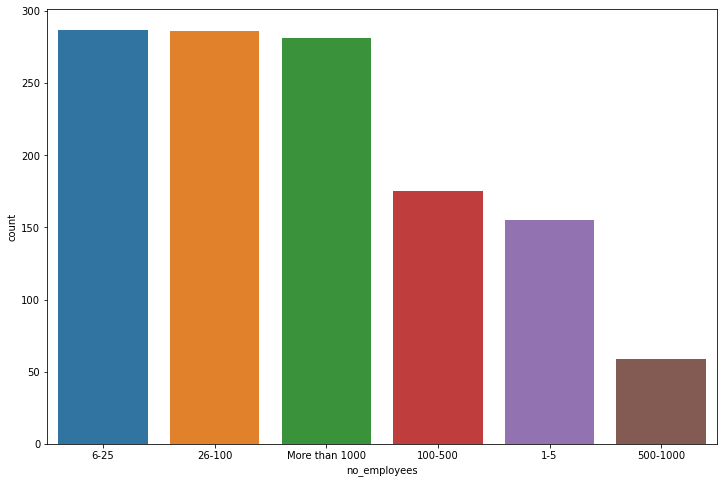

In [16]:
#check distribution for number of employees prior to dropping self employed individuals
plt.figure(figsize=(12, 8));
sns.countplot(mhtech['no_employees'], order=mhtech['no_employees'].value_counts().index);

In [17]:
mhtech['no_employees'].value_counts()

6-25              287
26-100            286
More than 1000    281
100-500           175
1-5               155
500-1000           59
Name: no_employees, dtype: int64

In [18]:
#filter out self employed individuals
mhtech = mhtech[mhtech.self_employed != 'Yes']

C:\Users\amass\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


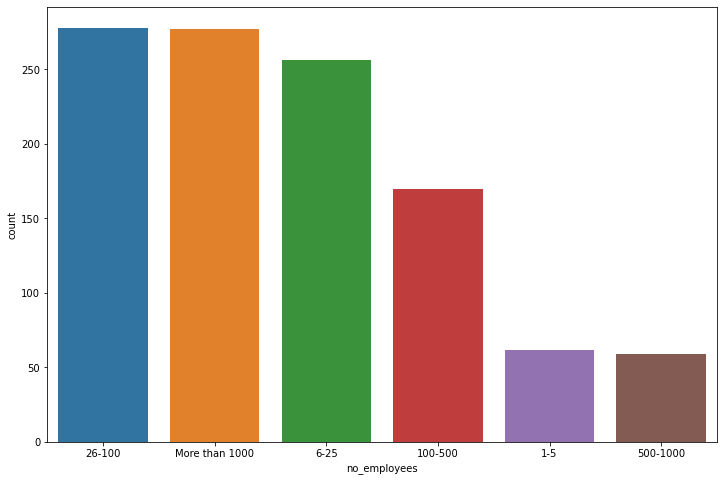

In [19]:
#check distribution of number of employees after removing self employed individuals
plt.figure(figsize=(12, 8));
sns.countplot(mhtech['no_employees'], order=mhtech['no_employees'].value_counts().index);

In [20]:
mhtech['no_employees'].value_counts()

26-100            278
More than 1000    277
6-25              256
100-500           170
1-5                62
500-1000           59
Name: no_employees, dtype: int64

In [21]:
#removing self employed did not remove all 1-5 instances. We will drop them now
mhtech = mhtech[mhtech.no_employees != '1-5']

In [22]:
#dropping self employed column as we have no more need for it
mhtech.drop('self_employed', axis = 1, inplace = True)

In [24]:
#We only need individuals who work in tech so filter for tech = yes, then remove tech_company column
mhtech = mhtech[mhtech.tech_company != 'No']
mhtech.drop('tech_company', axis = 1, inplace = True)

In [26]:
#work_interfere has alot of nan values, this is most likely because the question isnt applicable to individuals without
#mental health issues. 
#I will replace nan values with a value: not applicable so there arent missing values

mhtech.work_interfere.fillna(value = 'NotApplicable', inplace = True)

In [27]:
mhtech.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'NotApplicable'],
      dtype=object)

In [28]:
mhtech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 1257
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        833 non-null    int64 
 1   Gender                     833 non-null    object
 2   Country                    833 non-null    object
 3   family_history             833 non-null    object
 4   treatment                  833 non-null    object
 5   work_interfere             833 non-null    object
 6   no_employees               833 non-null    object
 7   remote_work                833 non-null    object
 8   benefits                   833 non-null    object
 9   care_options               833 non-null    object
 10  wellness_program           833 non-null    object
 11  seek_help                  833 non-null    object
 12  anonymity                  833 non-null    object
 13  leave                      833 non-null    object
 14  mental_he

In [29]:
#data cleaning removed 426 instances

In [30]:
#save data
mhtech.to_csv('mhtech.csv', index = False)